In [3]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v1')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

In [4]:
Q = np.zeros((STATES, ACTIONS))  # create a matrix with all 0 values 
Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [5]:
EPISODES = 2000 # how many times to run the enviornment from the beginning
MAX_STEPS = 100  # max number of steps allowed for each run of enviornment

LEARNING_RATE = 0.81  # learning rate
GAMMA = 0.96

In [1]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v1')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

Q = np.zeros((STATES, ACTIONS))

EPISODES = 1500 # how many times to run the enviornment from the beginning
MAX_STEPS = 100  # max number of steps allowed for each run of enviornment

LEARNING_RATE = 0.81  # learning rate
GAMMA = 0.96

RENDER = False # if you want to see training set to true

epsilon = 0.9


/home/charlie-chin/.local/lib/python3.8/site-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/charlie-chin/.local/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [2]:
new_step_api=True

In [3]:
rewards = []
for episode in range(EPISODES):

  state = env.reset()
  for _ in range(MAX_STEPS):
    
    if RENDER:
      env.render()

    if np.random.uniform(0, 1) < epsilon:
      action = env.action_space.sample()  
    else:
      action = np.argmax(Q[state, :])

    next_state, reward, done, _ = env.step(action)

    Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[next_state, :]) - Q[state, action])

    state = next_state

    if done: 
      rewards.append(reward)
      epsilon -= 0.001
      break  # reached goal

print(Q)
print(f"Average reward: {sum(rewards)/len(rewards)}:")
# and now we can see our Q values!

[[1.79585830e-01 1.62307459e-02 1.50394654e-02 1.62392680e-02]
 [2.97377924e-03 4.44008546e-03 5.64986007e-03 2.89925385e-01]
 [2.97279906e-03 2.12100857e-03 5.42788700e-03 1.57345873e-01]
 [8.62433314e-04 2.15712668e-03 1.99993651e-03 9.44655555e-02]
 [2.69562282e-01 1.36578917e-02 2.87002971e-03 4.02070213e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.85107817e-02 6.20553545e-06 2.75880254e-05 9.91742268e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.52117114e-03 1.05961292e-02 3.29844754e-03 4.85511890e-01]
 [2.89256162e-03 3.60484076e-01 4.01285033e-03 9.29409421e-03]
 [4.50539569e-01 6.34572258e-04 1.01059992e-03 1.58663202e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.44075293e-02 3.23577162e-02 5.15834522e-01 3.13885202e-02]
 [1.95224546e-01 9.04647959e-01 1.43629393e-01 1.87261262e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

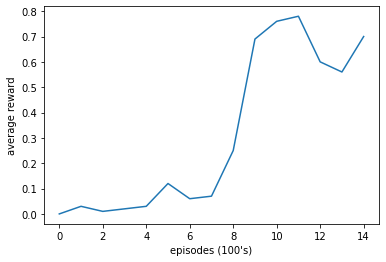

In [4]:
# we can plot the training progress and see how the agent improved
import matplotlib.pyplot as plt

def get_average(values):
  return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
  avg_rewards.append(get_average(rewards[i:i+100])) 

plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)')
plt.show()